<a href="https://colab.research.google.com/github/varunjanumpally31/KDAG-Tasks/blob/master/Pixel_wise_Segmentation_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
def KMean(data_points, k, iterations = 10):
  centroids = initialize_centroids(data_points, k)
  for iteration in range(iterations):
    closest_centroid = closest(data_points, centroids)
    centroids = move_centroids(data_points, centroids, closest_centroid)
  final_colors = np.zeros_like(data_points)
  for i in range(data_points.shape[0]):
    final_colors[i] = centroids[closest_centroid[i]]
  return final_colors


In [ ]:
def find_distance(data_point, centroid):
  return np.sqrt((data_point - centroid)**2).sum()

In [ ]:
def closest(data_points, centroids):
  closest_centroid = []
  for i in range(data_points.shape[0]):
    distances = []
    for j in range(centroids.shape[0]):
      distance = find_distance(data_points[i], centroids[j])
      distances.append(distance)
    closest_centroid.append(np.argmin(distances))
  return closest_centroid

In [ ]:
def initialize_centroids(data_points, k):
  centroids = data_points.copy()
  np.random.shuffle(centroids)
  return centroids[:k]

In [ ]:
def move_centroids(data_points, centroids, closest_centroid):
  new_centroids = np.zeros_like(centroids)
  sums = np.zeros_like(centroids)
  counters = np.zeros(centroids.shape[0])
  for i in range(data_points.shape[0]):
    for j in range(centroids.shape[0]):
      if j == closest_centroid[i]:
        sums[j] += data_points[i]
        counters[j] += 1
  for i in range(centroids.shape[0]):
    new_centroids[i] = sums[i]/counters[i]
  return new_centroids   


In [ ]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

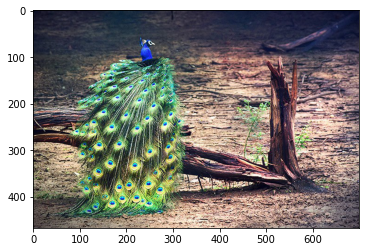

In [ ]:
img = io.imread('/content/Image.jpeg')
plt.imshow(img/255.0)

In [ ]:
data = np.reshape((img/255.0), (-1,3))

(326900, 3)


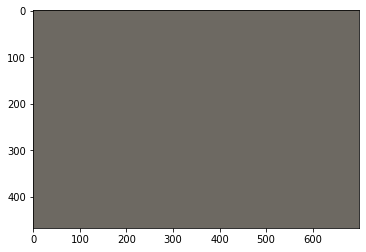

In [ ]:
colors_after_clustering = KMean(data, 1)
print(colors_after_clustering.shape)
image_after_clustering = np.reshape(colors_after_clustering, (img.shape))
plt.imshow(image_after_clustering)
plt.imsave('Image_after_compressing_into_1_clusters.png',image_after_clustering)

(326900, 3)


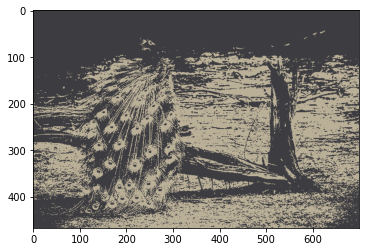

In [ ]:
colors_after_clustering = KMean(data, 2)
print(colors_after_clustering.shape)
image_after_clustering = np.reshape(colors_after_clustering, (img.shape))
plt.imshow(image_after_clustering)
plt.imsave('Image_after_compressing_into_2_clusters.png',image_after_clustering)

(326900, 3)


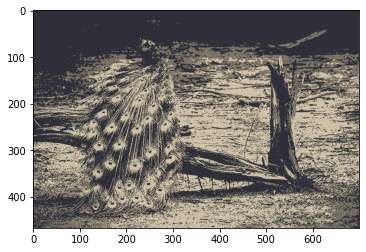

In [ ]:
colors_after_clustering = KMean(data, 3)
print(colors_after_clustering.shape)
image_after_clustering = np.reshape(colors_after_clustering, (img.shape))
plt.imshow(image_after_clustering)
plt.imsave('Image_after_compressing_into_3_clusters.png',image_after_clustering)